In [1]:
# https://mail.google.com/mail/u/0/#inbox/QgrcJHrnscJGjsRzFLPzmGMZSlGWKMsntRB

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from childes_mi.utils.paths import DATA_DIR, ensure_dir, DROSOPHILA_DIR
import urllib.request

In [4]:
from tqdm.autonotebook import tqdm
import h5py
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import pandas as pd

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [5]:
mat_file = list(DROSOPHILA_DIR.glob('*.mat'))[0]
mat_file

PosixPath('/mnt/cube/tsainbur/Projects/github_repos/childes_mi_project/data/raw/DROSOPHILA_Data_Dir/transition_data.mat')

In [6]:
ds = scipy.io.loadmat(mat_file.as_posix())

In [7]:
ds.keys()

dict_keys(['__header__', '__version__', '__globals__', 'density', 'transition_states', 'xx', 'peakPoints', 'regionMap'])

In [8]:
ds['transition_states'][0]

array([array([[59],
       [43],
       [11],
       ...,
       [43],
       [40],
       [44]], dtype=uint8)], dtype=object)

In [9]:
states = [np.concatenate(np.concatenate(i)) for i in ds['transition_states']]

In [10]:
states[0]

array([59, 43, 11, ..., 43, 40, 44], dtype=uint8)

In [11]:
len(states[0])

10803

In [12]:
state_lens = [len(i) for i in states]

(array([ 3.,  1.,  6.,  8., 18., 11.,  8.,  3.,  0.,  1.]),
 array([ 7447. ,  8181.3,  8915.6,  9649.9, 10384.2, 11118.5, 11852.8,
        12587.1, 13321.4, 14055.7, 14790. ]),
 <a list of 10 Patch objects>)

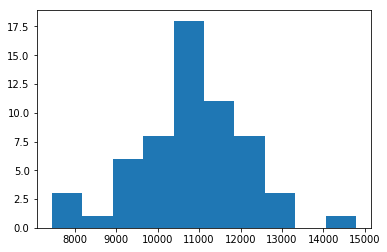

In [13]:
plt.hist(state_lens)

### Mutual information

In [14]:
from childes_mi.information_theory import mutual_information as mi

In [15]:
distances = np.arange(1,1001)

In [16]:
MI_DF_list = []
for sti, state in tqdm(enumerate(states)):
    (MI, MI_var), (shuff_MI, shuff_MI_var) = mi.sequential_mutual_information(
        [state], distances=distances, n_jobs=-1
    )
    MI_DF = pd.DataFrame(
        [[MI, MI_var, shuff_MI, shuff_MI_var, distances]],
        columns=["MI", "MI_var", "shuff_MI", "shuff_MI_var", "distances"],
    )
    MI_DF_list.append(MI_DF)
MI_DF = pd.concat(MI_DF_list)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   16.1s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   16.9s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   15.3s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   16.2s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   16.9s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   17.3s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   15.7s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   16.8s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   15.7s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   16.7s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   15.8s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   16.4s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   17.8s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   18.5s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   16.6s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   17.5s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   17.3s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   17.9s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   12.9s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   13.7s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   11.8s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   12.4s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   15.0s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   16.2s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   16.4s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   17.2s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   17.7s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   18.4s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    8.8s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    9.4s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   15.5s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   16.2s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    9.0s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    9.6s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   17.6s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   18.2s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   14.2s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   15.0s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   16.1s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   16.7s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   15.5s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   16.0s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   17.6s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   18.2s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   12.2s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   13.1s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   14.5s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   15.6s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   13.5s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   14.8s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   17.5s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   18.5s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   13.9s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   14.6s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   16.1s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   16.9s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   14.1s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   14.7s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   16.8s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   17.8s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   12.7s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   13.8s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   17.3s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   18.0s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   16.8s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   17.7s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   18.1s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   19.2s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   17.5s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   18.0s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   15.7s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   16.4s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   12.8s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   13.6s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   10.7s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   11.8s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    9.3s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    9.5s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   11.3s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   11.5s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   18.2s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   18.6s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   13.0s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   13.4s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   13.6s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   14.2s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   17.7s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   18.3s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   16.5s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   17.5s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   16.6s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   17.7s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   14.0s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   14.2s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   16.7s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   17.4s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   16.6s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   17.2s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   15.2s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   15.3s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   18.2s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   18.6s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   14.7s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   15.3s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   18.0s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   18.6s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   15.8s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   16.4s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   17.6s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   19.0s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   17.4s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   18.0s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   16.9s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   17.5s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   11.6s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   12.0s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   16.6s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   14.9s


[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   17.1s finished


In [17]:
MI_DF.to_pickle(DATA_DIR / "mi" / "drosophila_mi_1000_indv_MI.pickle")

In [18]:
row = MI_DF.iloc[0]

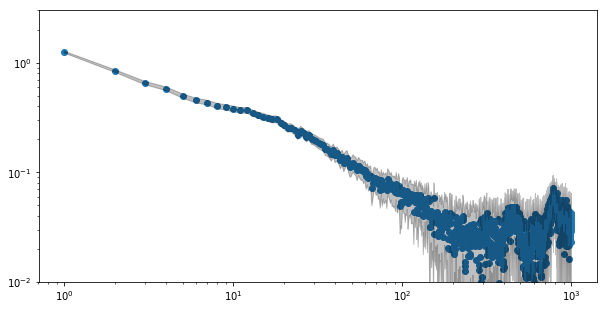

In [19]:
fig, ax = plt.subplots(figsize=(10,5))
MI = row.MI-row.shuff_MI
MI_var = row.MI_var

ax.scatter(distances, MI)
ax.fill_between(distances, MI-MI_var, MI+MI_var, alpha = 0.25, color= 'k')
ax.set_ylim([1e-2, 3])
ax.set_yscale('log')
ax.set_xscale('log')

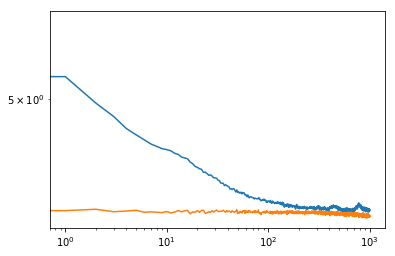

In [20]:
plt.loglog(row.MI)
plt.loglog(row.shuff_MI)

In [21]:
len(MI_DF)

59

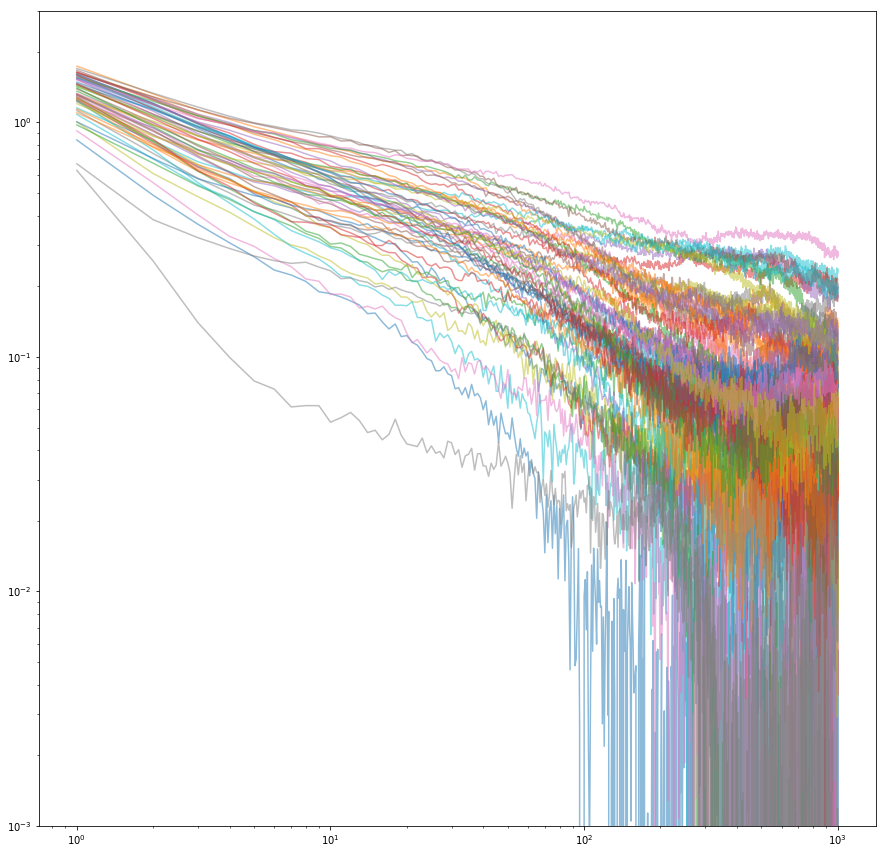

In [23]:
fig, ax = plt.subplots(figsize=(15,15))

for idx, row in MI_DF.iterrows():
    MI = row.MI-row.shuff_MI
    MI_var = row.MI_var

    ax.plot(distances, MI, alpha=0.5)
    #ax.fill_between(distances, MI-MI_var, MI+MI_var, alpha = 0.25, color= 'k')
    ax.set_ylim([1e-3, 3])
    ax.set_yscale('log')
    ax.set_xscale('log')

In [26]:
print(len(MI_DF), [len(i) for i in states])

59 [10803, 9565, 11079, 10303, 10063, 11336, 11424, 11757, 11542, 9775, 10981, 12450, 10601, 12073, 7964, 8958, 8561, 11936, 11412, 10793, 9528, 10688, 10962, 11294, 10008, 11011, 9118, 10099, 12850, 12721, 13206, 11962, 11689, 11175, 11111, 11737, 11963, 14790, 9451, 7447, 9990, 12404, 8061, 10849, 10618, 9808, 10573, 10918, 11119, 9438, 10890, 11010, 11600, 10033, 10776, 10596, 12002, 12017, 11030]


### individual behavioral sequences

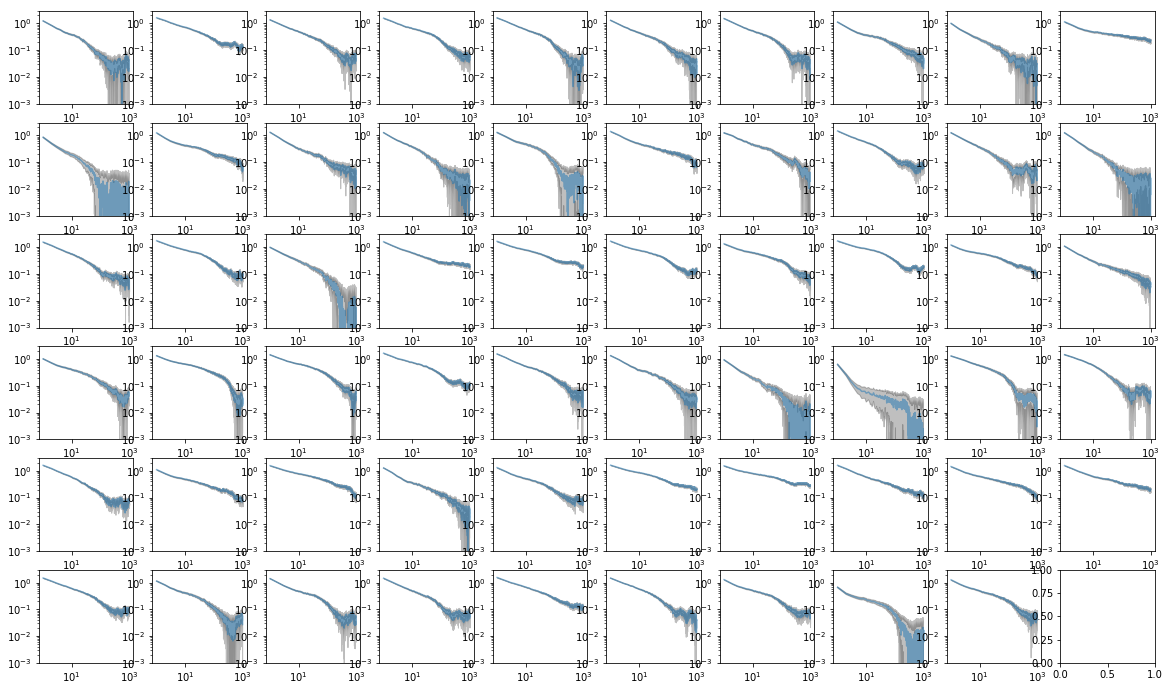

In [28]:
fig, axs = plt.subplots(ncols = 10, nrows=6, figsize = (20,12))
for ri, (idx, row) in tqdm(enumerate(MI_DF.iterrows())):
    ax = axs.flatten()[ri]
    MI = row.MI-row.shuff_MI
    MI_var = row.MI_var

    ax.plot(distances, MI, alpha=0.5)
    ax.fill_between(distances, MI-MI_var, MI+MI_var, alpha = 0.25, color= 'k')
    ax.set_ylim([1e-3, 3])
    ax.set_yscale('log')
    ax.set_xscale('log')